## Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Custom dataset for Diseases and pests/train'
valid_path = '/content/drive/MyDrive/Custom dataset for Diseases and pests/val'

In [ ]:

DenseNet = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
for layer in DenseNet.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Custom dataset for Diseases and pests/train/*')

In [ ]:
x = Flatten()(DenseNet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=DenseNet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Custom dataset for Diseases and pests/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 257 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Custom dataset for Diseases and pests/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 35 images belonging to 5 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-17-5932e3024fde>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
9/9 [==============================] - 7s 751ms/step - loss: 0.0064 - accuracy: 0.9961 - val_loss: 2.2866 - val_accuracy: 0.7714
Epoch 2/10
9/9 [==============================] - 5s 597ms/step - loss: 0.0077 - accuracy: 0.9961 - val_loss: 2.5934 - val_accuracy: 0.7714
Epoch 3/10
9/9 [==============================] - 6s 655ms/step - loss: 0.0377 - accuracy: 0.9961 - val_loss: 2.6486 - val_accuracy: 0.7714
Epoch 4/10
6/9 [===================>..........] - ETA: 1s - loss: 0.0022 - accuracy: 1.0000

KeyboardInterrupt: ignored

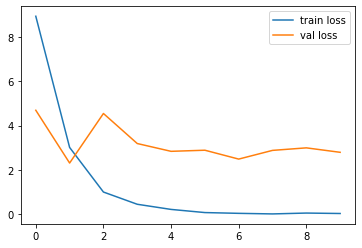

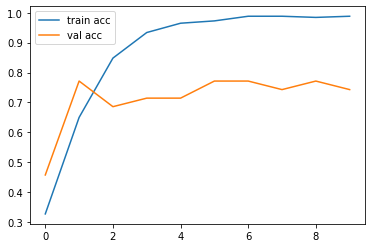

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import tensorflow as tf
tf.keras.models.save_model(model,'dense_model.hdf5')